# Import

In [96]:
import random
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.utils import resample
from IPython.display import clear_output

# Upload Data

In [101]:
address  = '../../Dataset/'
train_df = pd.read_csv(address + 'mitbih_train.csv', header=None)

# Resample

In [102]:
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]
df_0 = (train_df[train_df[187] == 0]).sample(n=20000, random_state=42)

df_1_upsample = resample(df_1, replace=True, n_samples=20000, random_state=123)
df_2_upsample = resample(df_2, replace=True, n_samples=20000, random_state=124)
df_3_upsample = resample(df_3, replace=True, n_samples=20000, random_state=125)
df_4_upsample = resample(df_4, replace=True, n_samples=20000, random_state=126)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

equilibre = train_df[187].value_counts()
print(equilibre)

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64


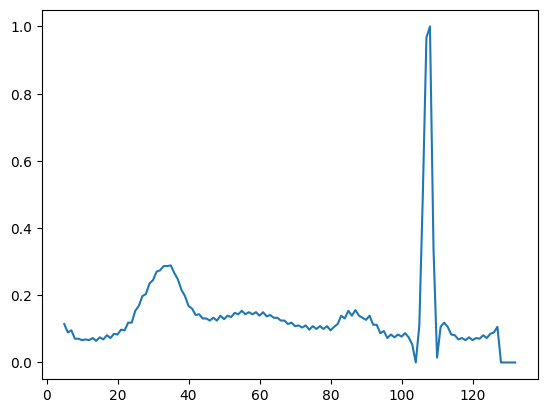

In [51]:
sample = train_df.iloc[1000, 5:133]

plt.plot(sample)
plt.show()

# Add noise

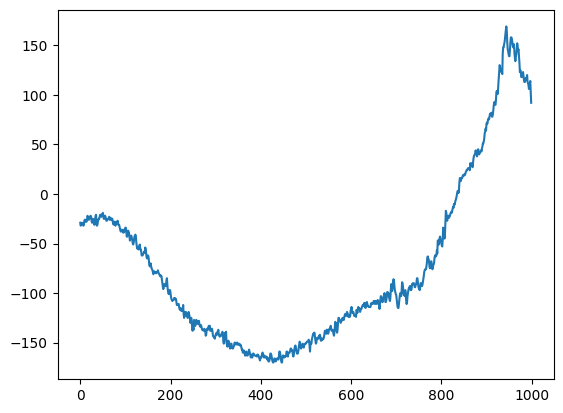

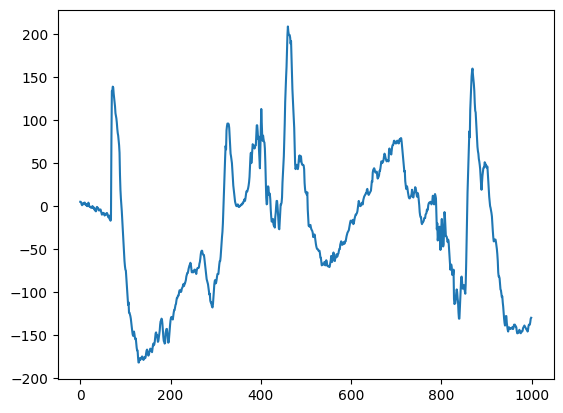

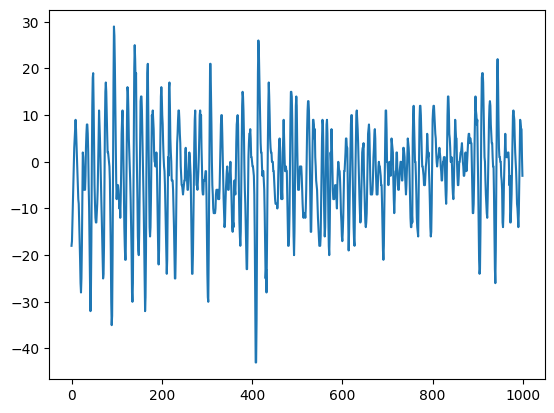

In [53]:
bwm = scipy.io.loadmat(address + 'bwm.mat')['val'][0, :]
emm = scipy.io.loadmat(address + 'emm.mat')['val'][0, :]
mam = scipy.io.loadmat(address + 'mam.mat')['val'][0, :]

plt.plot(bwm[0:1000])
plt.show()
plt.plot(emm[0:1000])
plt.show()
plt.plot(mam[0:1000])
plt.show()

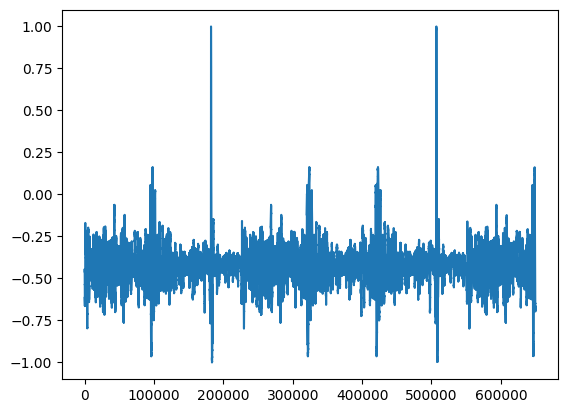

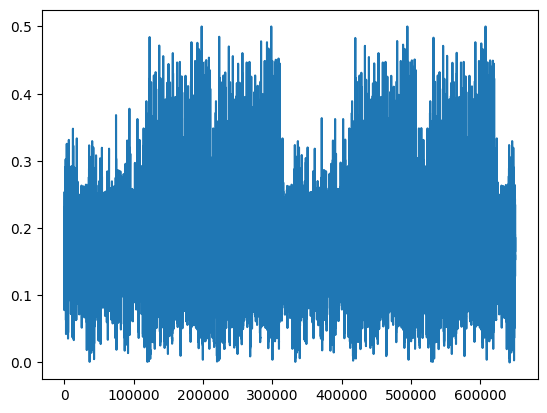

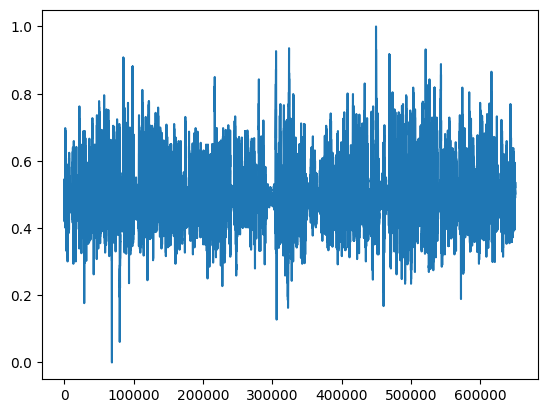

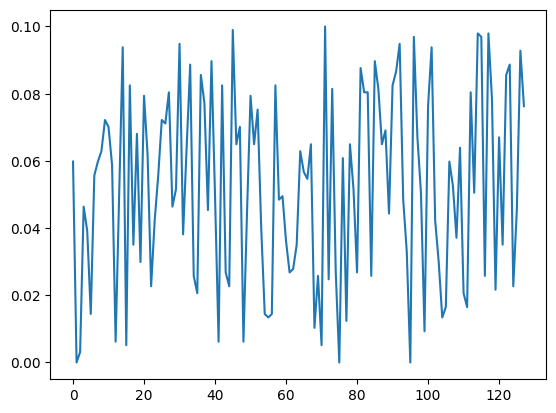

In [89]:
bwm = 2 * ((bwm - bwm.min())/(bwm.max() - bwm.min())) - 1
emm = 0.5 * (emm - emm.min())/(emm.max() - emm.min())
mam = (mam - mam.min())/(mam.max() - mam.min())
rdm = np.random.randint(100, size=(128))
rdm = 0.1 * ((rdm - rdm.min())/(rdm.max() - rdm.min()))

plt.plot(bwm)
plt.show()
plt.plot(emm)
plt.show()
plt.plot(mam)
plt.show()
plt.plot(rdm)
plt.show()

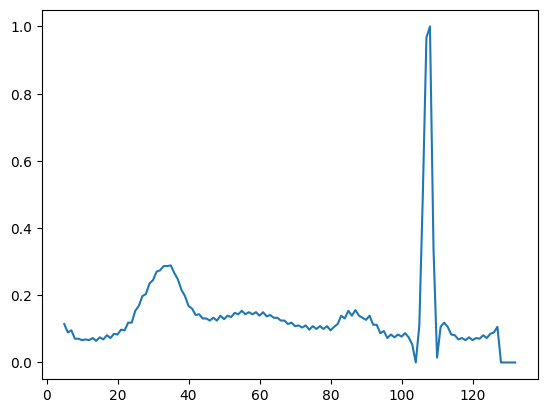

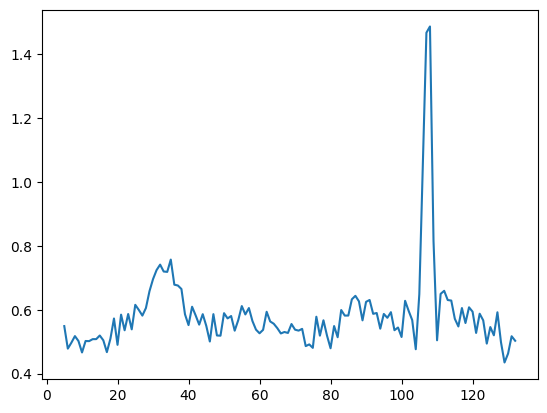

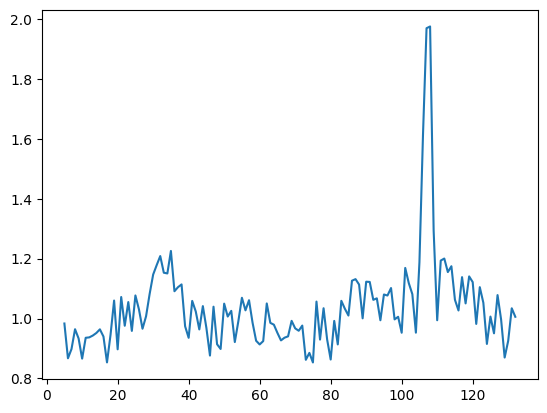

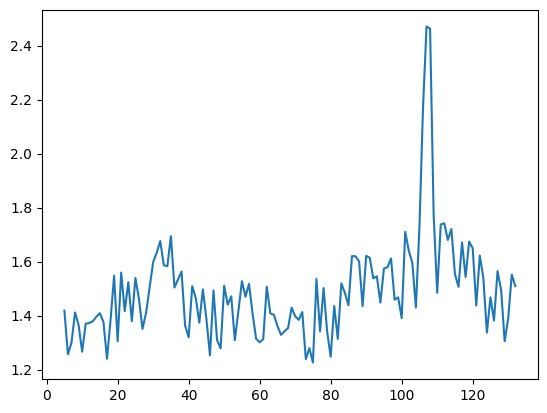

In [91]:
start = random.randint(0, 640000) 

# 0, 1, 2, 3
bwm_factor = 0
emm_factor = 0
mam_factor = 0
rdm_factor = 0

noisy_sample = sample + bwm[start:start+128] * bwm_factor + emm[start:start+128] * emm_factor + mam[start:start+128] * mam_factor + rdm_factor * rdm

plt.plot(noisy_sample)
plt.show()

# 0, 1, 2, 3
bwm_factor = 1
emm_factor = 1
mam_factor = 1
rdm_factor = 1

noisy_sample = sample + bwm[start:start+128] * bwm_factor + emm[start:start+128] * emm_factor + mam[start:start+128] * mam_factor + rdm_factor * rdm

plt.plot(noisy_sample)
plt.show()

# 0, 1, 2, 3
bwm_factor = 2
emm_factor = 2
mam_factor = 2
rdm_factor = 2

noisy_sample = sample + bwm[start:start+128] * bwm_factor + emm[start:start+128] * emm_factor + mam[start:start+128] * mam_factor + rdm_factor * rdm

plt.plot(noisy_sample)
plt.show()

# 0, 1, 2, 3
bwm_factor = 3
emm_factor = 3
mam_factor = 3
rdm_factor = 3

noisy_sample = sample + bwm[start:start+128] * bwm_factor + emm[start:start+128] * emm_factor + mam[start:start+128] * mam_factor + rdm_factor * rdm

plt.plot(noisy_sample)
plt.show()

In [ ]:
counter = 0

for i in range(len(train_df)):
    row = train_df.iloc[i]
    My_signal = row[5:133]
    My_class = int(row[187])
    My_data = []
    
    for bwm_factor in range(4):
        for emm_factor in range(4):
            for mam_factor in range(4):
                for rdm_factor in range(4):
                    start = random.randint(0, 640000) 
                    noisy_sample = list(My_signal + bwm[start:start+128] * bwm_factor + emm[start:start+128] * emm_factor + mam[start:start+128] * mam_factor + rdm_factor * rdm)
                    
                    noisy_sample.append(My_class)
                    noisy_sample.append(bwm_factor)
                    noisy_sample.append(emm_factor)
                    noisy_sample.append(mam_factor)
                    noisy_sample.append(rdm_factor)
                    
                    np.save(address + 'Final/' + str(counter).zfill(8) + '.npy', np.array(noisy_sample))
                    counter = counter + 1